# Convolutional Neural Network (CNN)

### Import TensorFlow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/data.zip

Streaming output truncated to the last 5000 lines.
  inflating: zero/9325_idx5_x451_y1001_class0.png  
  inflating: zero/9325_idx5_x451_y1101_class0.png  
  inflating: zero/9325_idx5_x451_y1151_class0.png  
  inflating: zero/9325_idx5_x451_y1201_class0.png  
  inflating: zero/9325_idx5_x451_y201_class0.png  
  inflating: zero/9325_idx5_x451_y251_class0.png  
  inflating: zero/9325_idx5_x451_y301_class0.png  
  inflating: zero/9325_idx5_x451_y351_class0.png  
  inflating: zero/9325_idx5_x451_y401_class0.png  
  inflating: zero/9325_idx5_x451_y451_class0.png  
  inflating: zero/9325_idx5_x451_y501_class0.png  
  inflating: zero/9325_idx5_x451_y551_class0.png  
  inflating: zero/9325_idx5_x451_y601_class0.png  
  inflating: zero/9325_idx5_x451_y651_class0.png  
  inflating: zero/9325_idx5_x451_y701_class0.png  
  inflating: zero/9325_idx5_x451_y751_class0.png  
  inflating: zero/9325_idx5_x451_y851_class0.png  
  inflating: zero/9325_idx5_x501_y1001_class0.png  
  inflating: zero/9325_idx

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
import random
import numpy as np
import pandas as pd
import copy
import tensorflow as tf
from tensorflow.keras import optimizers

np_load_old = np.load # save np.load
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

from skimage.segmentation import mark_boundaries
import matplotlib.pylab as plt

import itertools
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

import keras
from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
# from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [ ]:
# import os,cv2

# X_1 = os.listdir('/content/one')
# X_0 = os.listdir('/content/zero')

# X_1 = X_1[0:10]
# X_0 = X_1[0:10]
 
# X = []
# Y = []

# # for image1 in X_1:
# #   img1 = cv2.imread(os.path.join('/content/one', image1))
# #   print(img1)
# #   if(img1.shape == (50,50,3)):
# #     X.append(img1)
# #     Y.append(1)
  
# for image0 in X_0:
#   img2 = cv2.imread(os.path.join('/content/zero', image0))
#   print(img2)
#   if img2.shape == (50,50,3):
#     X.append(img2)
#     Y.append(0)

# X = np.array(X)
# Y = np.array(Y)



In [ ]:
import glob,cv2

X_1 = glob.glob('/content/one/*png')
X_0 = glob.glob('/content/zero/*png')

# print(X_1)
 
X = []
Y = []

for image1 in X_1:
  img1 = cv2.imread( image1)
  # print(img1)
  if(img1.shape == (50,50,3)):
    X.append(img1)
    Y.append(1)
  
for image0 in X_0:
  img2 = cv2.imread(image0)
  # print(img2)
  if img2.shape == (50,50,3):
    X.append(img2)
    Y.append(0)




Shuffling the data

In [ ]:
import random
temp = list(zip(X,Y))
random.shuffle(temp)

X,Y = zip(*temp)
X = np.array(X)
Y = np.array(Y)

In [ ]:
type(X), type(Y), X.shape, Y.shape

(numpy.ndarray, numpy.ndarray, (271286, 50, 50, 3), (271286,))

In [ ]:
# X = np.load('/content/drive/MyDrive/X.npy') # images
# Y = np.load('/content/drive/MyDrive/Y.npy') # labels associated to images (0 = no IDC, 1 = IDC)
# # print(X)
# # print(Y)


# Describe the dataset

In [ ]:
type(X), type(Y), X.shape, Y.shape

(numpy.ndarray, numpy.ndarray, (271286, 50, 50, 3), (271286,))

In [ ]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Percentage of positive images: {:.2f}%'.format(100*np.mean(b)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,Y)

Total number of images: 271286
Number of IDC(-) Images: 193029
Number of IDC(+) Images: 78257
Percentage of positive images: 28.85%
Image shape (Width, Height, Channels): (50, 50, 3)


In [ ]:
# indices = np.arange(X.shape[0])
# np.random.shuffle(indices)
# indices = list(indices)
# X = X[indices]
# Y = Y[indices]


In [ ]:
Y[:20]

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
IDC_0_sample = X[Y==0] # (0 = no IDC, 1 = IDC)
IDC_1_sample = X[Y==1] 
 
IDC_0_sample
# def plotOne(a,b):
#     """
#     Plot one numpy array
#     """
#     plt.subplot(1,2,1)
#     plt.title('IDC (-)')
#     plt.imshow(a)
#     plt.subplot(1,2,2)
#     plt.title('IDC (+)')
#     plt.imshow(b)
# plotOne(IDC_0_sample, IDC_1_sample) 


array([[[[241, 244, 242],
         [222, 210, 215],
         [190, 179, 200],
         ...,
         [186, 157, 222],
         [178, 146, 213],
         [181, 155, 218]],

        [[242, 239, 239],
         [240, 237, 240],
         [209, 191, 217],
         ...,
         [196, 168, 221],
         [167, 139, 223],
         [181, 151, 221]],

        [[242, 240, 241],
         [243, 239, 243],
         [199, 180, 216],
         ...,
         [187, 158, 200],
         [195, 165, 215],
         [173, 129, 171]],

        ...,

        [[242, 241, 244],
         [244, 242, 242],
         [243, 240, 244],
         ...,
         [179, 149, 200],
         [169, 138, 221],
         [161, 127, 213]],

        [[245, 241, 242],
         [240, 238, 244],
         [243, 241, 240],
         ...,
         [170, 138, 225],
         [171, 138, 221],
         [168, 139, 220]],

        [[235, 236, 237],
         [244, 240, 244],
         [244, 242, 243],
         ...,
         [174, 144, 214],
        

### Dataset Preparation


Our BCHI[https://www.kaggle.com/paultimothymooney/breast-histopathology-images ] includes breast histopathology images in which 198,738 are IDC negative and 78,786 are IDC positive having 50x50x3 dimensions 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


# Normalize pixel values to be between 0 and 1
X_train = X_train
X_test = X_test

X_train.shape,X_test.shape

((217028, 50, 50, 3), (54258, 50, 50, 3))

### Verify the data

To verify that the dataset looks correct, let's plot the first 18 images from the training set and display the class name below each image:


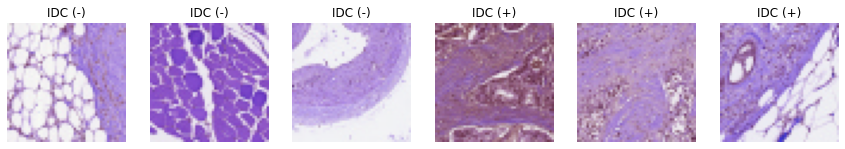

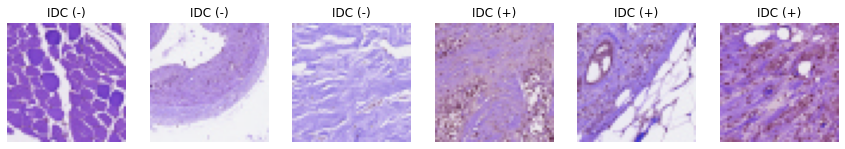

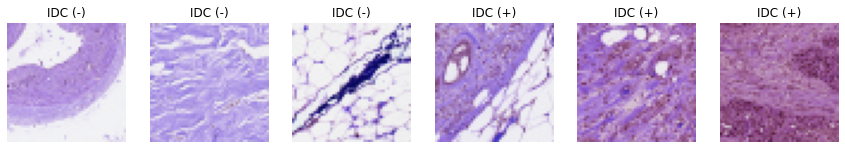

In [ ]:
def plotTwo(a,b): 
    """
    Plot a bunch of numpy arrays sorted by label
    """
    for row in range(3):
        plt.figure(figsize=(20, 10))
        for col in range(3):
            plt.subplot(1,8,col+1)
            plt.title('IDC (-)')
            plt.imshow(a[row+col])
            plt.axis('off')       
            plt.subplot(1,8,col+4)
            plt.title('IDC (+)')
            plt.imshow(b[row+col])
            plt.axis('off')
plotTwo(IDC_0_sample, IDC_1_sample) 


### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D] and [MaxPooling2D] layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (50, 50, 3), which is the format of BCHI images. You can do this by passing the argument `input_shape` to your first layer.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

### Add Dense layers on top



In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

Here's the complete architecture of your model:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 5184)              0

The network summary shows that (9, 9, 64) outputs were flattened into vectors of shape (5184) before going through two Dense layers.

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test),batch_size=250)


Epoch 1/10
869/869 [==============================] - 758s 871ms/step - loss: 0.8346 - accuracy: 0.8089 - val_loss: 0.4122 - val_accuracy: 0.8211
Epoch 2/10
869/869 [==============================] - 758s 873ms/step - loss: 0.3911 - accuracy: 0.8297 - val_loss: 0.3824 - val_accuracy: 0.8334
Epoch 3/10
869/869 [==============================] - 757s 871ms/step - loss: 0.3783 - accuracy: 0.8351 - val_loss: 0.3709 - val_accuracy: 0.8385
Epoch 4/10
869/869 [==============================] - 749s 862ms/step - loss: 0.3653 - accuracy: 0.8411 - val_loss: 0.3702 - val_accuracy: 0.8363
Epoch 5/10
869/869 [==============================] - 747s 859ms/step - loss: 0.3517 - accuracy: 0.8490 - val_loss: 0.3455 - val_accuracy: 0.8504
Epoch 6/10
869/869 [==============================] - 741s 853ms/step - loss: 0.3359 - accuracy: 0.8560 - val_loss: 0.3340 - val_accuracy: 0.8579
Epoch 7/10
869/869 [==============================] - 744s 856ms/step - loss: 0.3297 - accuracy: 0.8594 - val_loss: 0.3303 -

### Evaluate the model

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

NameError: ignored

In [ ]:
print(test_acc)

0.8559290766716003


In [ ]:
#save the model
import pickle
pickle.dump(model, open('/content/drive/MyDrive/Colab Notebooks/model.txt','wb'))


INFO:tensorflow:Assets written to: ram://ac1da7e3-e689-4835-ac16-46e7dd01b44e/assets


#ANN Model

In [ ]:
model.add(tf.keras.layers.Dense( units =300, activation = 'relu', input_shape = (7500,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',  metrics = ['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 5184)              0

In [ ]:
# model.add(Dense(4, input_shape=(X_train.shape[0:]), activation='tanh'))
# model.add(Dense(2, activation='tanh'))
# model.add(Dense(1, activation='sigmoid'))


# model.compile(tf.keras.optimizers.Adam(learning_rate=0.01), 'binary_crossentropy', metrics=['accuracy'])

# model.summary()

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = 10 ,batch_size=250)

Epoch 1/10
869/869 [==============================] - 738s 849ms/step - loss: 0.3189 - accuracy: 0.8661 - val_loss: 0.3182 - val_accuracy: 0.8651
Epoch 2/10
869/869 [==============================] - 738s 849ms/step - loss: 0.3082 - accuracy: 0.8697 - val_loss: 0.3160 - val_accuracy: 0.8651
Epoch 3/10
869/869 [==============================] - 739s 850ms/step - loss: 0.3037 - accuracy: 0.8727 - val_loss: 0.3236 - val_accuracy: 0.8636
Epoch 4/10
869/869 [==============================] - 737s 849ms/step - loss: 0.2955 - accuracy: 0.8767 - val_loss: 0.3215 - val_accuracy: 0.8629
Epoch 5/10
288/869 [========>.....................] - ETA: 7:43 - loss: 0.2878 - accuracy: 0.8799

In [ ]:
test_loss , test_accuracy = model.evaluate(X_test, y_test)


In [ ]:
y_pred = model.predict(X_test)
print('y_pred shape: ', y_pred.shape)

y_pred,y_test

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 8.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=f8f4a678e4e37726cc4f56f8a69a39cd84cec973c8b9e75b216c5994ac8498ed
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm

explainer = lime_image.LimeImageExplainer() 

segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

In [ ]:
class_0_indices = []
class_1_indices = []

for i in range(y_pred.shape[0]):
    j = 1 if y_pred[i][1] >= 0.5 else 0
    
    if y_test[i] == 1 and j == 1:
        class_1_indices.append(i)
        
    if y_test[i] == 0 and j == 0:
        class_0_indices.append(i)

NameError: ignored

IndexError: ignored

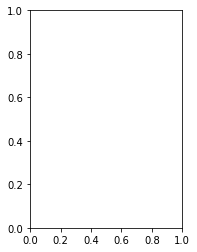

In [ ]:
plt.subplot(1, 2, 1)

IDC_0_sample_idx = class_0_indices[26] 
IDC_0_sample_test = X_test[IDC_0_sample_idx] 

plt.imshow(IDC_0_sample_test,
           interpolation = 'none')
plt.title('IDC: {}'.format(y_test_raw[IDC_0_sample_idx]))


plt.subplot(1, 2, 2)

IDC_1_sample_idx = class_1_indices[8] 
IDC_1_sample_test =  X_test_copy[IDC_1_sample_idx]

plt.imshow(IDC_1_sample_test, 
           interpolation = 'none')
plt.title('IDC: {}'.format(y_test_raw[IDC_1_sample_idx]))

In [ ]:
explanation_1 = explainer.explain_instance(IDC_1_sample_test, 
                                         classifier_fn = model.predict, 
                                         top_labels=2, 
                                         hide_color=0, # 0 - gray 
                                         num_samples=10000,
                                         segmentation_fn=segmenter
                                        )

NameError: ignored

In [ ]:
fig, ax1 = plt.subplots(1, 1)

ax1.imshow(IDC_1_sample_test, interpolation = 'none')

ax1.set_title('IDC: 1')

In [ ]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation_1.get_image_and_mask(explanation_1.top_labels[0], 
                                            positive_only=True, 
                                            num_features=20, 
                                            hide_rest=True)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [ ]:
temp, mask = explanation_1.get_image_and_mask(explanation_1.top_labels[0], 
                                            positive_only=True, 
                                            num_features=20, 
                                            hide_rest=False)

print('explanation 1 top labels[0] = ', explanation_1.top_labels[0])
plt.imshow(mark_boundaries(temp, mask))

In [ ]:
explanation_2 = explainer.explain_instance(IDC_0_sample_test, 
                                         classifier_fn = model.predict, 
                                         top_labels=2, 
                                         hide_color=0, 
                                         num_samples=10000,
                                         segmentation_fn=segmenter
                                        )

In [ ]:
fig, ax1 = plt.subplots(1, 1)

ax1.imshow(IDC_0_sample_test, interpolation = 'none')

ax1.set_title('IDC: 0')

In [ ]:
fig, ax1 = plt.subplots(1,1)

ax1.imshow(X_test[IDC_0_sample_idx], interpolation = 'none')

ax1.set_title('IDC: 0')

In [ ]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation_2.get_image_and_mask(explanation_2.top_labels[0], 
                                            positive_only=True, 
                                            num_features=20, 
                                            hide_rest=True)

print('explanation 2 top labels[0] = ', explanation_2.top_labels[0])
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [ ]:
temp, mask = explanation_2.get_image_and_mask(explanation_2.top_labels[0], 
                                            positive_only=True, 
                                            num_features=20, 
                                            hide_rest=False)
print('explanation 2 top labels[0] = ', explanation_2.top_labels[0])
plt.imshow(mark_boundaries(temp, mask))